In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import sys
sys.path.append("..")
from ml_editor.data_processing import format_raw_df

data_path = Path('../data/writers.csv')
df = pd.read_csv(data_path)
df = format_raw_df(df.copy())

/Users/emmanuel.ameisen/ml_editor/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from ml_editor.data_processing import get_split_by_author, get_vectorized_inputs_and_label, add_features_to_df

df = add_features_to_df(df.loc[df["is_question"]].copy(), pretrained_vectors=True)
train_df, test_df = get_split_by_author(df, test_size=0.2, random_state=40)

In [3]:
X_train, y_train = get_vectorized_inputs_and_label(train_df)
X_test, y_test = get_vectorized_inputs_and_label(test_df)

In [4]:
from sklearn.externals import joblib

model_path = Path("../models/model_1.pkl")
clf = joblib.load(model_path) 

y_predicted = clf.predict(X_test)
y_predicted_proba = clf.predict_proba(X_test)

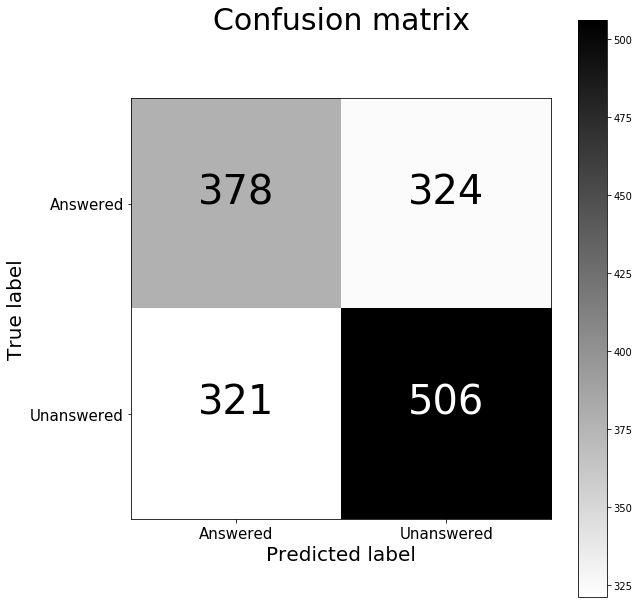

In [5]:
from ml_editor.model_evaluation import get_confusion_matrix_plot

get_confusion_matrix_plot(y_predicted, y_test, figsize=(9, 9))
plt.show()

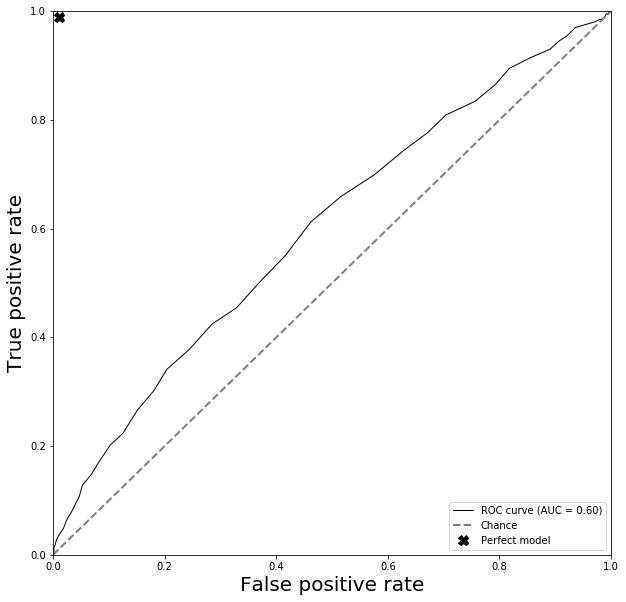

In [6]:
from ml_editor.model_evaluation import get_roc_plot

get_roc_plot(y_predicted_proba[:,1], y_test, figsize=(10,10))
plt.show()


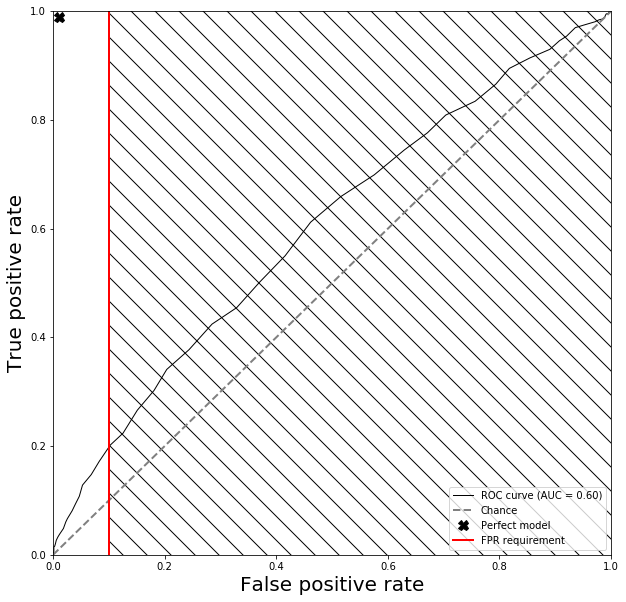

In [7]:
get_roc_plot(y_predicted_proba[:,1], y_test, fpr_bar=.1, figsize=(10,10))
plt.show()

No handles with labels found to put in legend.


	Brier: 0.241


<module 'matplotlib.pyplot' from '/Users/emmanuel.ameisen/ml_editor/lib/python3.6/site-packages/matplotlib/pyplot.py'>

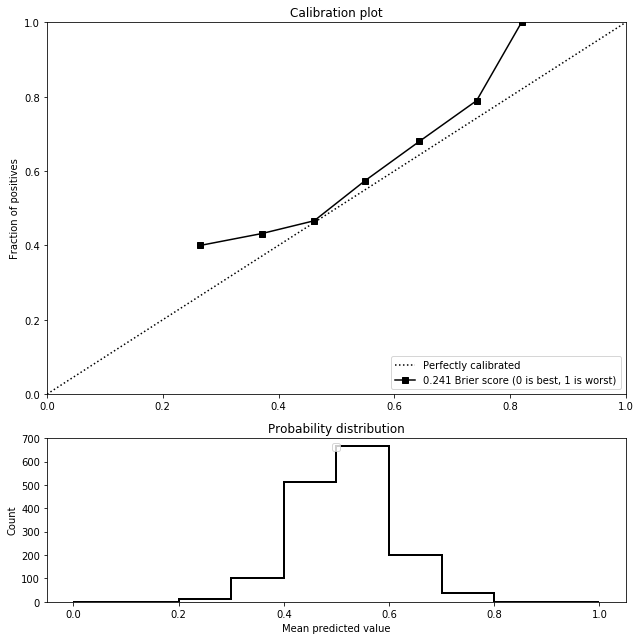

In [8]:
from ml_editor.model_evaluation import get_calibration_plot

get_calibration_plot(y_predicted_proba[:,1], y_test, figsize=(9,9))
